<a href="https://colab.research.google.com/github/Smfatima/Deep-Learning/blob/main/Computer%20Vision/CIFAR_image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
#import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt                                      

In [3]:
#load and split datset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


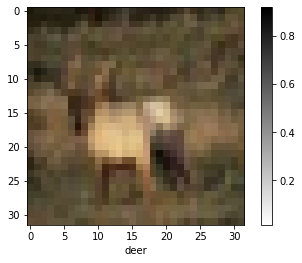

In [4]:
#Normalize pixel values to be b/w 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#let's look at one picture
IMG_INDEX = 3
plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
#CNN architecture

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
#adding dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
#Training

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9108 - val_loss: 1.4669 - val_accuracy: 0.6877
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2229 - accuracy: 0.9192 - val_loss: 1.4227 - val_accuracy: 0.6926
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2093 - accuracy: 0.9248 - val_loss: 1.5320 - val_accuracy: 0.6967
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1980 - accuracy: 0.9296 - val_loss: 1.6050 - val_accuracy: 0.6845
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1805 - accuracy: 0.9346 - val_loss: 1.6025 - val_accuracy: 0.6892


In [14]:
#Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)


313/313 - 1s - loss: 1.6025 - accuracy: 0.6892
0.6891999840736389
